## IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#plt.rcParams['figure.figsize'] = [12, 8]
#plt.rcParams['figure.dpi'] = 100 

IMPORTING A SAMPLE OF THE DATA

In [3]:

main = pd.read_csv('main.tsv', sep='\t', header=0,nrows = 100000)

In [4]:
# Illustration of the top 5 rows in order to see how our table looks like
main.head()

,user_id,search_id,search_timestamp,point_of_sale,geo_location_country,is_mobile,destination_id,checkin_date,checkout_date,adult_count,child_count,infant_count,room_count,sort_type,applied_filters,impressions
0,001bbff3030c95740d4c55bb72e823e9,541933a931216d270f53277c2de068d0,2021-07-02T19:38:00.000Z,2,1,0,898,2021-07-04,2021-07-05,2,0,0,1,RECOMMENDED,NaN,"1,5695234,1,4.0,250.0,2.0,1,0,3,0,0|2,1734546,..."
1,002ba2a7c74dbffc32e4568af230d49a,25b8ebecb15b8f3edb5eed36a1f699b4,2021-06-23T03:39:00.000Z,1,1,0,50,2021-09-10,2021-09-14,2,0,0,1,PRICE ASCENDING,NaN,"1,5151135,0,null,null,null,1,1,1,0,0"
2,00c5152ed6ef5b937e8320a260bde084,349c86ff1be41553878e01988ca209d1,2021-06-10T00:08:00.000Z,1,1,0,49,2021-07-07,2021-07-12,2,0,0,1,RECOMMENDED,NaN,"1,1624072,0,4.0,1250.0,4.0,1,1,2,1,0|2,5170759..."
3,00d5e2bca7962f67d5695e7e7b92feb8,d3b41f5d906b3f5e56bcafd4a7428634,2021-07-16T01:08:00.000Z,12,1,0,13,2021-08-25,2021-08-28,2,0,0,1,RECOMMENDED,NaN,"1,2391667,1,4.0,1625.0,5.0,0,0,5,0,0|2,4930059..."
4,013f92616fe583c4ba0c3919b69cf3d9,a359fd984e5ae5be64af5226dd1e9fe2,2021-07-07T20:49:00.000Z,1,1,0,206,2021-08-30,2021-09-04,1,0,0,1,RECOMMENDED,VIPONLY:FALSE,"1,6714720,1,5.0,225.0,3.0,1,0,5,0,0|2,5593294,..."


In [5]:
if main['user_id'].nunique() == len(main):
    print('All users have explored only once')
else: print('Some users have visited the points of sales more than once')
print('Total unique users: ',main['user_id'].nunique(),' and total data entries: ',len(main))

Some users have visited the points of sales more than once
Total unique users:  31209  and total data entries:  100000


EXPLORATORY DATA ANALYSIS

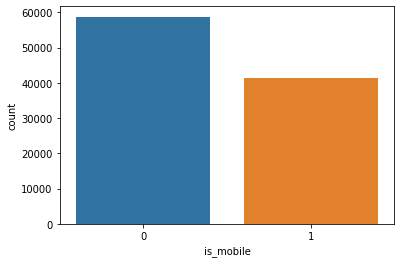

In [6]:
# Let's see how many searches were conducted via cellphone and how many not


ax = sns.countplot(x="is_mobile", data=main)

In [7]:
# As it looks many searches were conducted without date restrictions
main.isna().sum()

user_id                     0
search_id                   0
search_timestamp            0
point_of_sale               0
geo_location_country        0
is_mobile                   0
destination_id              0
checkin_date                7
checkout_date               7
adult_count                 0
child_count                 0
infant_count                0
room_count                  0
sort_type                   0
applied_filters         66598
impressions                 0
dtype: int64

In [8]:

def correct_neg(x): # Created in order to substitute negative entries with Nan values on the below column
    if x<0:
        x= None
    return x

In [9]:
#Extracting date out of the timestamp. This aims to see how
# many days before staying did the search take place
main['search_date'] = main['search_timestamp'].str[:10]
main['search_date']= pd.to_datetime(main['search_date'])
main['check_date']= pd.to_datetime(main['checkin_date'])
main['days_before_staying'] = main['check_date'] - main['search_date']
main['days_before_staying'] = pd.to_timedelta(main['days_before_staying'], errors='coerce').dt.days
main['days_before_staying'] = main['days_before_staying'].apply(correct_neg)

c:\users\ezet\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


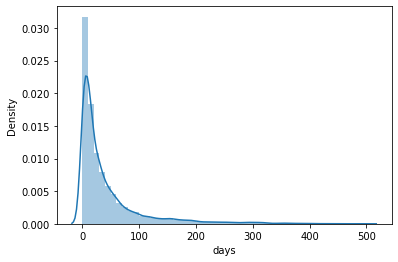

In [10]:
ax = sns.distplot(x=main['days_before_staying'],axlabel='days')

# We see that most of the people do not schedule much ahead. Maybe they decide vacations or business at the 
#very last moment, or waiting for something better to rise until the last moment

In [11]:
print('The collected data are searches between ',min(main['search_date'].dt.date),' and ',
      max(main['search_date'].dt.date))

The collected data are searches between  2021-06-01  and  2021-07-31


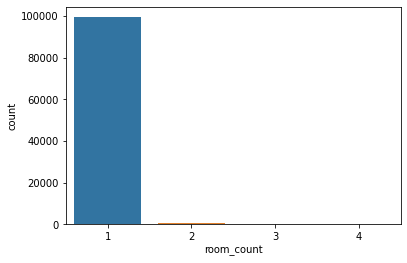

In [12]:
#How many rooms were the searches about
ax = sns.countplot(x=main['room_count'])

Transforming some integers to strings since the do not have quantity meaning

In [13]:
main['user_id'] = main['user_id'].astype('str')
main['search_id'] = main['search_id'].astype('str')
main['point_of_sale'] = main['point_of_sale'].astype('str')
main['geo_location_country'] = main['geo_location_country'].astype('str')
main['destination_id'] = main['destination_id'].astype('str')

In [14]:
main.dtypes

user_id                         object
search_id                       object
search_timestamp                object
point_of_sale                   object
geo_location_country            object
is_mobile                        int64
destination_id                  object
checkin_date                    object
checkout_date                   object
adult_count                      int64
child_count                      int64
infant_count                     int64
room_count                       int64
sort_type                       object
applied_filters                 object
impressions                     object
search_date             datetime64[ns]
check_date              datetime64[ns]
days_before_staying            float64
dtype: object

In [15]:
def child_bool(x, y): 
    return x + y  > 0  

New column revealing whether it is a family search or not

In [16]:
main['with_children'] =main.apply(lambda x: child_bool(x['child_count'], x['infant_count']), axis=1)

In [17]:
# How many searches included chuldren and how many not
main['with_children'].value_counts()

False    85796
True     14204
Name: with_children, dtype: int64

In [18]:
# Total people of each search
main['total_people'] = main['adult_count']+ main['child_count']+main['infant_count']

c:\users\ezet\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\ezet\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


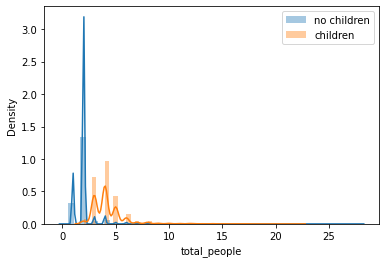

In [19]:
# Comparison bwtween distributions of total people whether kids are included or not
sns.distplot(main[~main['with_children']]['total_people'], label='no children', color='C0')
sns.distplot(main[main['with_children']]['total_people'], label='children', color='C1')

plt.legend()

# EXPORTING CLICKED AND BOOKED HOTELS OUT OF ATTRIBUTE: 'IMPRESSIONS'

In [20]:
df = main

In [21]:
# The following function is accepting as
#input a string and splits it on char '|'
#If the strings that were designed after the split have as last 3 characters these--> '0,0'
#it means that this string's hotel was neither clicked nor booked. I do this in order to keep
# the rest of the hotels. So the function return the strings with hotels booked or clicked
def func(x):
    b = []
    x = x.split('|')
    for i in x:
        if i[-3:] != '0,0':
            b.append(i)
    if len(b) == 0:
        b = 0
    return b

In [22]:
# Applying the function on the impressions columns
df['impressions'] = df['impressions'].apply(func)

In [23]:
df = df[['user_id','search_timestamp', "days_before_staying",'impressions']]

In [24]:
df

,user_id,search_timestamp,days_before_staying,impressions
0,001bbff3030c95740d4c55bb72e823e9,2021-07-02T19:38:00.000Z,2.0,"[7,2722643,0,4.0,75.0,3.0,1,1,2,1,0, 9,1197530..."
1,002ba2a7c74dbffc32e4568af230d49a,2021-06-23T03:39:00.000Z,79.0,0
2,00c5152ed6ef5b937e8320a260bde084,2021-06-10T00:08:00.000Z,27.0,"[1,1624072,0,4.0,1250.0,4.0,1,1,2,1,0]"
3,00d5e2bca7962f67d5695e7e7b92feb8,2021-07-16T01:08:00.000Z,40.0,0
4,013f92616fe583c4ba0c3919b69cf3d9,2021-07-07T20:49:00.000Z,54.0,0
...,...,...,...,...
99995,6319e4de4c9bff4c11d59eb02b1cab98,2021-06-05T01:28:00.000Z,49.0,"[5,5890703,0,4.0,450.0,3.0,1,0,2,1,0]"
99996,6319e4de4c9bff4c11d59eb02b1cab98,2021-06-09T17:29:00.000Z,45.0,0
99997,631a0b600f0df4cd406ac7141df87725,2021-06-08T03:04:00.000Z,216.0,0
99998,631a0b600f0df4cd406ac7141df87725,2021-06-08T03:06:00.000Z,237.0,0


In [25]:
# Getting rid of searches without clicks
df =df[df['impressions']!=0]

In [26]:
#resetting index
df = df.reset_index()

In [27]:
#dropping the previous index column
df.drop('index', inplace=True, axis=1)

In [28]:
df

,user_id,search_timestamp,days_before_staying,impressions
0,001bbff3030c95740d4c55bb72e823e9,2021-07-02T19:38:00.000Z,2.0,"[7,2722643,0,4.0,75.0,3.0,1,1,2,1,0, 9,1197530..."
1,00c5152ed6ef5b937e8320a260bde084,2021-06-10T00:08:00.000Z,27.0,"[1,1624072,0,4.0,1250.0,4.0,1,1,2,1,0]"
2,016f433e1e98146912a7c2600c2ad3f0,2021-06-25T05:54:00.000Z,30.0,"[1,1417933,0,4.0,200.0,3.0,1,0,1,2,0]"
3,01a367de6a4a099fbd380ad28f9314aa,2021-06-10T22:04:00.000Z,53.0,"[1,4291709,0,4.0,1025.0,3.0,1,0,5,1,0]"
4,028382cf0696909da6c5bc201a4a2027,2021-06-04T09:01:00.000Z,14.0,"[1,1767157,0,4.0,25.0,5.0,1,1,4,2,0]"
...,...,...,...,...
19022,623c11cd9714441e3339f15e09fdcde1,2021-06-09T23:15:00.000Z,50.0,"[37,6231012,0,4.0,25.0,null,0,0,1,1,0, 38,6590..."
19023,623c11cd9714441e3339f15e09fdcde1,2021-06-09T23:17:00.000Z,50.0,"[21,1899208,0,4.0,475.0,4.0,1,0,5,1,0]"
19024,62dc2866ab6c76ec55847d0fb204515a,2021-07-16T00:11:00.000Z,25.0,"[1,1085533,0,3.0,400.0,2.0,1,1,1,1,0]"
19025,6319e4de4c9bff4c11d59eb02b1cab98,2021-06-01T18:02:00.000Z,10.0,"[1,740717,0,4.0,350.0,3.0,1,0,3,2,0]"


In [29]:
# Buliding a new df which contains only users,days_before_staying and impressions
df2 = pd.DataFrame(columns=[])
a=[]
b=[]
c=[]
d=[]

for i in range(0,len(df)):
    for y in range(0,len(df['impressions'][i])):
        a.append(df['user_id'][i])
        b.append(df['search_timestamp'][i])
        c.append(df['days_before_staying'][i])
        d.append(df['impressions'][i][y])
        
df2['user_id'] = a
df2['search_timestamp'] = b
df2['days_before_staying'] = c
df2['impressions'] = d

In [30]:
# Splitting the information inside impressions

def collapse(x):
    return x.split(',')

In [31]:

df2['impressions'] = df2['impressions'].apply(collapse)

In [32]:
# Creating new columns
names = ['rank','prop_id','is_travel_ad','review_rating','review_count',
         'star_rating','is_free_cancellation','is_drr','price_bucket',
        'num_clicks','is_trans']
for i in range(0,len(names)):
    
    df2[names[i]] = df2['impressions'].apply(lambda x: x[i])

In [33]:
# Types of columns
df2.dtypes

user_id                  object
search_timestamp         object
days_before_staying     float64
impressions              object
rank                     object
prop_id                  object
is_travel_ad             object
review_rating            object
review_count             object
star_rating              object
is_free_cancellation     object
is_drr                   object
price_bucket             object
num_clicks               object
is_trans                 object
dtype: object

In [34]:
# Replacing texts writting null with actual None
df2 = df2.replace('null', None)

In [35]:
df2.isna().sum()

user_id                   0
search_timestamp          0
days_before_staying     553
impressions               0
rank                      0
prop_id                   0
is_travel_ad              0
review_rating             0
review_count              0
star_rating               0
is_free_cancellation      0
is_drr                    0
price_bucket              0
num_clicks                0
is_trans                  0
dtype: int64

In [36]:
# Changing types of columns

df2['rank']=df2['rank'].astype(float)

df2['is_travel_ad']=df2['is_travel_ad'].astype(float)
df2['review_rating']=df2['review_rating'].astype(float)
df2['review_count']=df2['review_count'].astype(float)
df2['star_rating']=df2['star_rating'].astype(float)
df2['is_free_cancellation']=df2['is_free_cancellation'].astype(float)
df2['is_drr']=df2['is_drr'].astype(float)
df2['num_clicks']=df2['num_clicks'].astype(int)
df2['is_trans']=df2['is_trans'].astype(int)
# I do not care about the quantity of clicks on a hotel
# When we have clicks I will assume that the user clicked it
df2['num_clicks'] = df2['num_clicks'].apply(lambda x: x>0).astype(int)

In [37]:
df2['search_timestamp'] =pd.to_datetime(df2['search_timestamp'])

In [38]:
df2 = df2.sort_values(by=['user_id', 'search_timestamp'])

In [39]:
df2 = df2.reset_index()
df2.drop('index', inplace=True, axis=1)

In [40]:
df2['price_bucket']=df2['price_bucket'].astype(int)

In [41]:
k = df2.groupby(['user_id','is_trans']).mean()['price_bucket']
k

user_id                           is_trans
0001ecbcc3ce52bef7428d7acfddf1ed  0           3.666667
000a82de0fd0ccab4e97ff022bba578b  0           2.500000
000b17934a0009684d348f57caddfbff  0           1.000000
000e912f93e58b490912e5ea7dac6357  0           2.000000
0010b47a07c3c15d5c7490adb6f92f93  0           4.000000
                                                ...   
ffe6eff69cfbcd0384b22a3493df35b6  0           2.500000
ffef11d7721684ff02676f10f3493c5f  0           2.222222
ffefdf472e2b722d0bc1ce307f1fcd3c  0           5.000000
fff4eec7b8cd7739932aef3778e54adb  0           4.000000
fff8d3bf8c10121abb2e94a36f367289  0           1.000000
Name: price_bucket, Length: 11740, dtype: float64

In [42]:
clicked = []
booked = []
for i in range(1,len(k.index)):
    if k.index[i-1][0]==k.index[i][0]:
        clicked.append(k[i-1])
        booked.append(k[i])

In [43]:
len(clicked)

706

In [44]:
len(booked)

706

c:\users\ezet\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\ezet\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


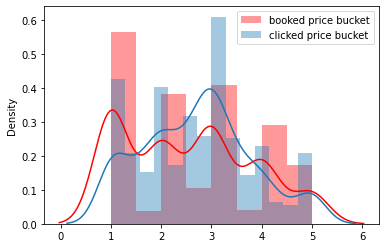

In [98]:
# Building dfs with only transactions and only not transactions
# I am aiming to isolate the users who booked AND clicked
users1 = df2[df2['is_trans']==1]['user_id']
users0 = df2[df2['is_trans']==0]['user_id']

In [99]:
df3 = df2.copy()

In [100]:
df3.drop(df3.index, inplace=True)

In [101]:
for i in users1.unique():
    if i in users0.unique():
        df3 = df3.append(df2[df2['user_id'] ==i])

In [121]:
df3['is_trans'].unique()

array([0, 1])

In [137]:
k = df3.groupby(['user_id','is_trans']).mean()

,is_trans,days_before_staying,rank,is_travel_ad,review_rating,review_count,star_rating,is_free_cancellation,is_drr,price_bucket,num_clicks
user_id,,,,,,,,,,,
007d0af9417f8987d80c5cad1afd553c,0,3.000000,46.416667,0.000000,4.270833,255.729167,3.020833,0.520833,0.229167,3.354167,1.0
007d0af9417f8987d80c5cad1afd553c,1,3.000000,26.647059,0.000000,4.058824,617.647059,2.823529,0.823529,0.352941,2.764706,1.0
00f6fde254b997483af767c48c7d56f4,0,17.692308,10.076923,0.230769,4.230769,1996.153846,3.538462,0.769231,1.000000,4.230769,1.0
00f6fde254b997483af767c48c7d56f4,1,0.000000,1.000000,0.000000,5.000000,1525.000000,4.000000,0.000000,0.000000,5.000000,1.0
016bd5f6835504003e6470a167bdefbf,0,10.000000,3.000000,0.500000,5.000000,725.000000,3.000000,1.000000,0.000000,4.500000,1.0
...,...,...,...,...,...,...,...,...,...,...,...
fedbb5f3d8236cccebefde049c7695c2,1,14.000000,3.000000,0.000000,5.000000,525.000000,3.000000,0.000000,0.000000,2.000000,0.0
ffabaf84a6596d1147c510b920489876,0,28.571429,11.285714,0.000000,4.285714,11185.714286,4.142857,0.714286,0.714286,2.857143,1.0
ffabaf84a6596d1147c510b920489876,1,69.000000,1.000000,0.000000,4.000000,375.000000,3.000000,0.000000,0.000000,3.000000,0.0


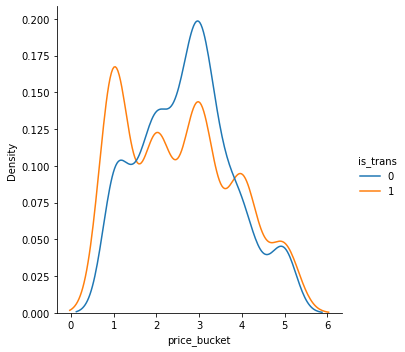

In [141]:
sns.displot(x = 'price_bucket',hue = 'is_trans',data = k, kind="kde")
# Obviously the visitors are clicking on average on more expensive 
# hotels than the ones they are booking